Script for plotting analytical eigenmodes for calcium diffusion in a rectangular tube with zero flux in the x-, y-, and z-directions.

Last updated: 05/25/22 4:11PM

Start by just plotting x-direction (same/similar in other directions)

In [50]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [69]:
# CONSTANTS
L_x = 4     # X LENGTH (um)
L_y = 0.5   # Y LENGTH (um)
L_z = 0.5   # Z LENGTH (um)

x_o = 2.35  # VDCC X LOC (um)
y_o = 0.25  # VDCC Y LOC (um)
z_o = 0     # VDCC Z LOC (um)

x_s = 2       # SNARE BOX CENTER X LOC (um)
y_s = 0.25    # SNARE BOX CENTER Y LOC (um)
z_s = 0       # SNARE BOX CENTER Z LOC (um)


# Test
#K = 100       # X eigenmodes
#L = 100       # Y eigenmodes
#M = 100       # Z eigenmodes
K = 11
L = 0
M = 0

t = 10       # time of interest (microsec, usec) "MCell models were also run 1,000 times for 10 $ms$ with a timestep of 1 $\mu s$"

In [71]:
def eigenmode_x(x, t, k):
    """X-component of the eigenmode

    Returns the individual x-direction eigenmode for a box 
    with an initial impulse of N_ca at x_o at t = t_o
    
    Args:
      x:
        location of interest point, x-direction
      t:
        time of interest point
      k:
        z-direction eigenmode

    Returns:
      A singular value giving the value of the individual x-direction Green's components
    """

    #if k == 0:
        #g_xk = 2 / L_x
    
    eigenmode_x = math.cos((k * math.pi * x) / L_x) 

    return eigenmode_x

In [72]:
# Find x-direction eigenmodes across time...
timepoints = np.linspace(1, 1000, 200)
x_modes = np.zeros((K, len(timepoints)))

# Point in sace
x = 2

# append eigenmode values
for k in range(K):
    for t_i in range(len(timepoints)):
        x_modes[k,t_i] = eigenmode_x(x, timepoints[t_i], k)


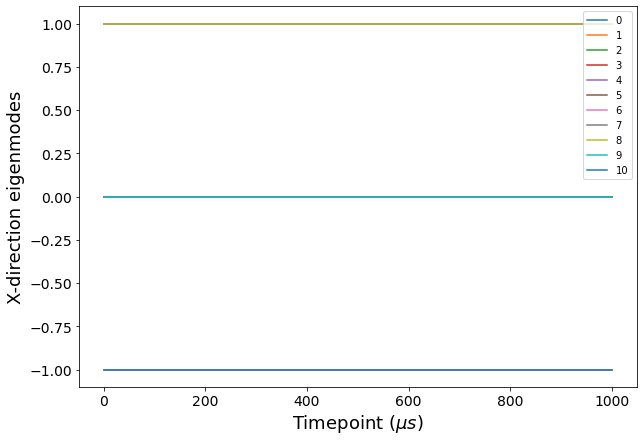

In [74]:
fig = plt.figure(figsize=(10,7))
for i in range(K):
    plt.plot(timepoints, x_modes[i,:])

#plt.ylim([-0.6,0.6])
plt.legend(range(K))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Timepoint ($\mu s$)", fontsize=18)
plt.ylabel("X-direction eigenmodes", fontsize=18)
plt.show()

In [76]:
def eigenmode(xyz, klm, t):
    """3-dimensional eigenmode

    Returns the individual eigenmode for a box 
    with an initial impulse of N_ca at x_o at t = t_o
    
    Args:
      x:
        location of interest point, x-direction
      t:
        time of interest point
      k:
        z-direction eigenmode

    Returns:
      A singular value giving the value of the individual x-direction Green's components
    """

    # Unpack input values
    [x, y, z] = xyz 
    [k, l, m] = klm
    
    eigenmode = math.cos((k * math.pi * x) / L_x) * math.cos((l * math.pi * y) / L_y) * math.cos((m * math.pi * z) / L_z)

    return eigenmode

In [ ]:
# Find eigenmodes across time...
timepoints = np.linspace(1, 1000, 200)
modes = np.zeros((K, len(timepoints)))

# Point in sace
x = 2

# append eigenmode values
for k in range(K):
    for t_i in range(len(timepoints)):
        x_modes[k,t_i] = eigenmode_x(x, timepoints[t_i], k)
